# **Flight Price Prediction**

**1.Data understanding**

In [140]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
df=pd.read_excel("/content/Data_Train.xlsx")

In [142]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [143]:
df = df.drop(['Additional_Info'],axis=1)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Price            10683 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 834.7+ KB


In [145]:
df.shape

(10683, 10)

In [146]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


**2.EDA**

In [147]:
df['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
9502       1
13875      1
7742       1
5703       1
4098       1
Name: Price, Length: 1870, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


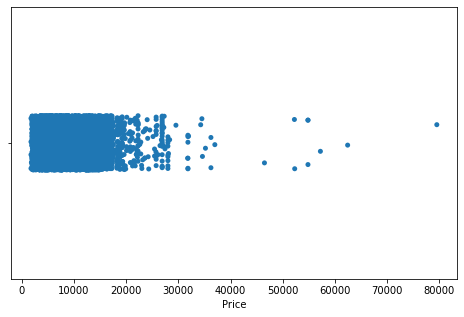

In [148]:
plt.figure(figsize=(8,5))
sns.stripplot(df['Price'])

In [149]:
for i in df.columns:
  print(df[i].value_counts())
  print("-------------------------------")

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
-------------------------------
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/0

In [150]:
df=df.dropna()

In [151]:
df.shape

(10682, 10)

In [152]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


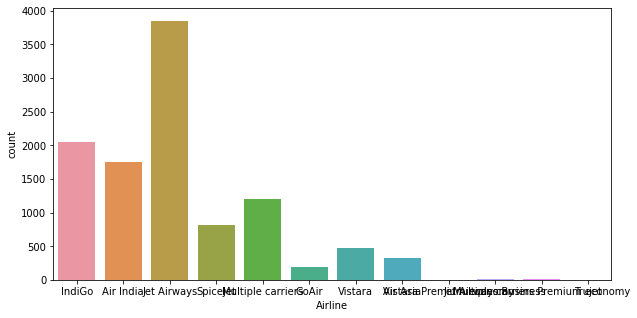

In [153]:
plt.figure(figsize=(10,5))
sns.countplot(df['Airline'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

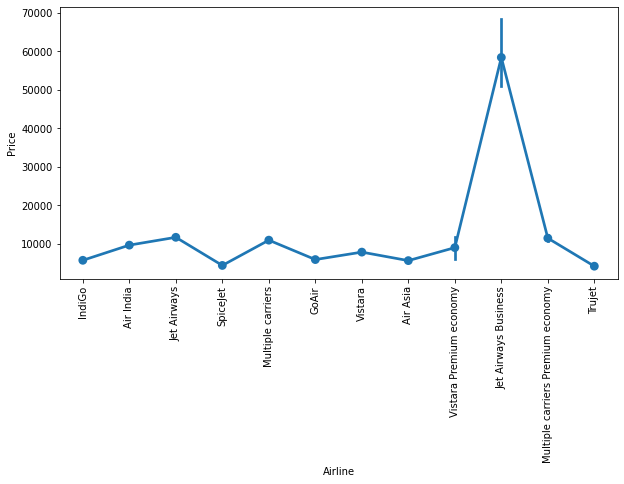

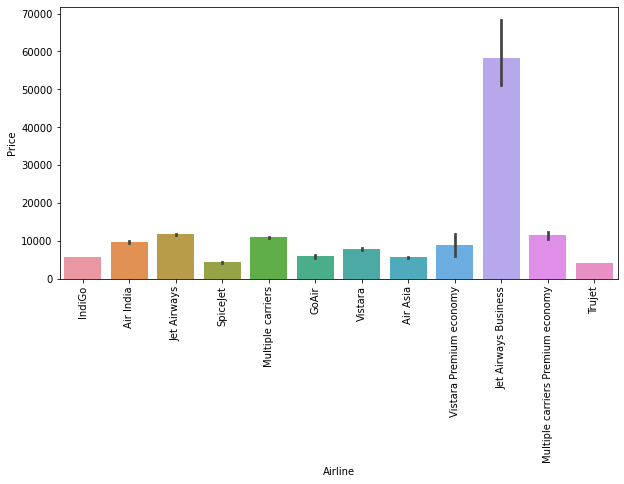

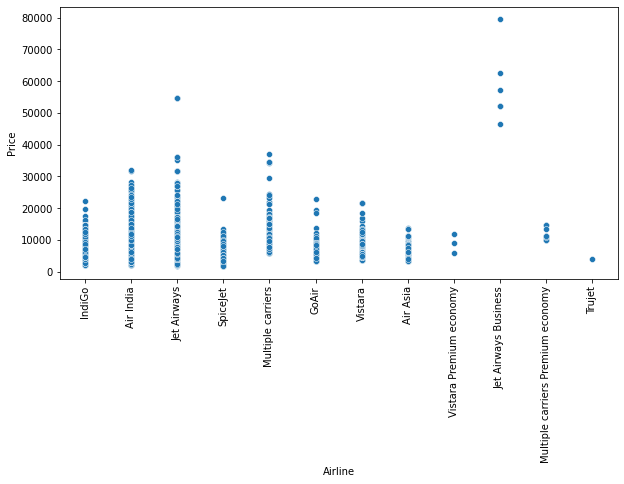

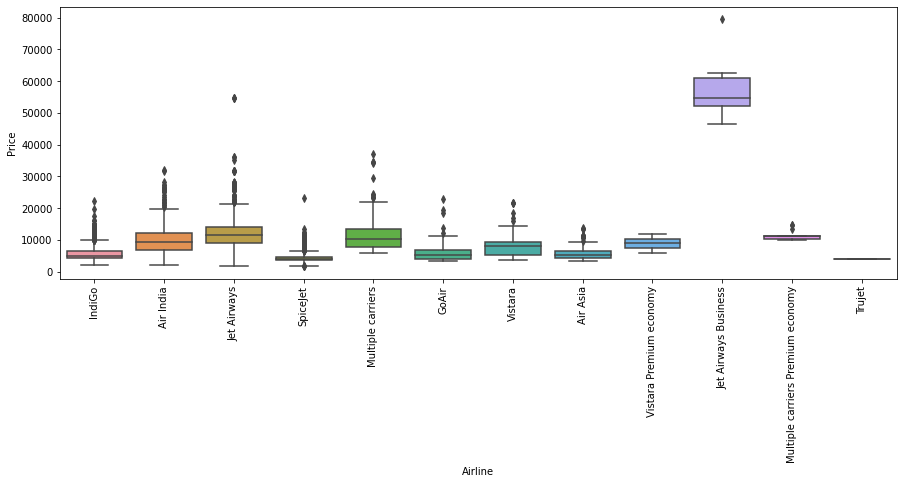

In [154]:
plt.figure(figsize=(10,5))

sns.pointplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)
plt.figure(figsize=(10,5))

sns.barplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)

plt.figure(figsize=(10,5))
sns.scatterplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)

plt.figure(figsize=(15,5))
sns.boxplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)

**3.Data Preprocessing**

In [155]:
feature = ['Arrival_Time','Dep_Time','Date_of_Journey','Total_Stops','Duration']
df.drop(feature,axis=1,inplace=True)

In [156]:
df.head()

,Airline,Source,Destination,Route,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,13882
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,6218
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,13302


In [161]:
df.head()

,Airline,Source,Destination,Route,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,13882
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,6218
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,13302


In [157]:
x= df.drop(columns='Price')
y= df['Price']

**encoding**

In [159]:
x=pd.get_dummies(x)

In [160]:
x.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_BLR → AMD → DEL,Route_BLR → BBI → DEL,Route_BLR → BDQ → DEL,Route_BLR → BOM → AMD → DEL,Route_BLR → BOM → BHO → DEL,Route_BLR → BOM → DEL,Route_BLR → BOM → IDR → DEL,Route_BLR → BOM → IDR → GWL → DEL,Route_BLR → BOM → IXC → DEL,Route_BLR → BOM → JDH → DEL,Route_BLR → BOM → NAG → DEL,Route_BLR → BOM → UDR → DEL,Route_BLR → CCU → BBI → DEL,Route_BLR → CCU → BBI → HYD → DEL,Route_BLR → CCU → BBI → HYD → VGA → DEL,Route_BLR → CCU → DEL,Route_BLR → CCU → GAU → DEL,...,Route_CCU → JAI → DEL → BLR,Route_CCU → KNU → BLR,Route_CCU → MAA → BLR,Route_CCU → NAG → BLR,Route_CCU → PAT → BLR,Route_CCU → PNQ → BLR,Route_CCU → RPR → HYD → BLR,Route_CCU → VNS → DEL → BLR,Route_CCU → VTZ → BLR,Route_DEL → AMD → BOM → COK,Route_DEL → AMD → COK,Route_DEL → ATQ → BOM → COK,Route_DEL → BBI → COK,Route_DEL → BDQ → BOM → COK,Route_DEL → BHO → BOM → COK,Route_DEL → BLR → COK,Route_DEL → BOM → COK,Route_DEL → CCU → BOM → COK,Route_DEL → COK,Route_DEL → DED → BOM → COK,Route_DEL → GOI → BOM → COK,Route_DEL → GWL → IDR → BOM → COK,Route_DEL → HYD → BOM → COK,Route_DEL → HYD → COK,Route_DEL → HYD → MAA → COK,Route_DEL → IDR → BOM → COK,Route_DEL → IXC → BOM → COK,Route_DEL → IXU → BOM → COK,Route_DEL → JAI → BOM → COK,Route_DEL → JDH → BOM → COK,Route_DEL → LKO → BOM → COK,Route_DEL → LKO → COK,Route_DEL → MAA → BOM → COK,Route_DEL → MAA → COK,Route_DEL → NAG → BOM → COK,Route_DEL → PNQ → COK,Route_DEL → RPR → NAG → BOM → COK,Route_DEL → TRV → COK,Route_DEL → UDR → BOM → COK,Route_MAA → CCU
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [168]:
x.shape

(10682, 151)

In [167]:
y.shape

(10682,)

**train_test_split**

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

In [163]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

**finding best random_state**

In [164]:
from sklearn.metrics import r2_score
d=5
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  lm=LinearRegression()
  lm.fit(x_train,y_train)
  pred_train=lm.predict(x_train)
  pred_test = lm.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)

0 3.2486507363184673e+21
1 6.395332609002686e+20
2 6.513074794777336e+20
3 2.9659934543651143e+22
4 1.6664181480567012e+22
5 3.2968585448017206e+20
6 4.176010758942107e+20
7 1.5071612071841202e+22
8 5.496786255881497e+21
9 1.2694033085015767e+21
10 4.4492614277179566e+20
11 1.2887807199161927e+22
12 3.506284759126687e+21
13 9.461195982374493e+20
14 1.640883362847125e+20
15 1.2001002318347498e+20
16 3.36851317267531e+20
17 1.4946507745795844e+20
18 1.7332306794516318e+22
19 2.1551618505517973e+21
20 5.96879333572955e+21
21 9.608688163614419e+23
22 1.8808295956098029e+22
23 3.798976590506557e+21
24 2.9887789969402335e+19
25 -0.005854890862295514
least value 25 -0.005854890862295514
26 2.0724394434133137e+22
27 7.290186954313918e+21
28 1.2277085757960463e+21
29 2.570264803061244e+18
30 2.4245195581684475e+21
31 5.956853746485432e+22
32 3.533723610172758e+18
33 5.953271850614292e+19
34 7.741146311560688e+18
35 3.780109237254368e+21
36 1.0671090055773652e+22
37 6.283510418717496e+19
38 2.99

In [192]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=25)

**Model Construction**

LinearRegression

In [193]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.6573576297452938


In [194]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))
print('r2_score:',r2_score(y_test,LR_predict))

Mean Absolute Error:  1790.514272344408
Mean Squared Error:  7619845.556855405
Root Mean Squared Error:  2760.406773802623
Explained Variance Score:  0.6634937303779194
r2_score: 0.6632125206075893


RandomForestRegressor

In [195]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predictions1=rf.predict(x_test)
print(rf.score(x_train,y_train))

0.6739867055752558


In [196]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  1704.2608867910594
Mean Squared Error:  7346108.290332123
Root Mean Squared Error:  2710.3705079439087
Explained Variance Score:  0.675641255013313
r2_score: 0.6753113595302762


DecisionTreeRegressor

In [197]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.6745586590096793


In [198]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Mean Absolute Error:  1703.9443853497587
Mean Squared Error:  7281444.8440404665
Root Mean Squared Error:  2698.41524677735
Explained Variance Score:  0.6784873571899637
r2_score: 0.6781694015893833


**Hyper parameter tuning**

In [199]:
from sklearn.model_selection import GridSearchCV
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [200]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]},
             pre_dispatch='2

In [201]:
GCV.best_params_

{'criterion': 'friedman_mse', 'max_depth': 12}

In [204]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(criterion='friedman_mse',max_depth=12)
DTR.fit(x_train,y_train)
DTR_final=DTR.predict(x_test)

In [205]:
print(DTR.score(x_train,y_train))

0.6745586590096793


In [206]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_final))
print('r2_score:',r2_score(y_test,DTR_final))

Mean Absolute Error:  1704.0716665851355
Mean Squared Error:  7282242.642823808
Root Mean Squared Error:  2698.563070010373
Explained Variance Score:  0.6784511419200909
r2_score: 0.6781341398981457


Final Model

In [208]:
import joblib
joblib.dump(DTR,"finalmodel.pkl")

['finalmodel.pkl']